In [34]:
from utils import *
from simanneal import Annealer
import random

root_dir = ""
label_count = 6

def populate_weights_map(path):
    weight_map = {}
    with open(path) as fr:
        for line in fr:
            tokens = line.strip().split()
            features = tokens[0].split(":")
            word = features[0].replace("Wi=","")
            label = features[-1].replace("Ti=","")
            weight_map[word+"_"+label] = float(tokens[1])
    return weight_map

class TagSolver(Annealer):
    
    def __init__(self, sentence, weights, state):
        self.sentence = sentence
        self.weights = weights
#         '': 8,
#  'B-LOC': 5,
#  'B-MISC': 6,
#  'B-ORG': 7,
#  'I-LOC': 4,
#  'I-MISC': 2,
#  'I-ORG': 0,
#  'I-PER': 3,
#  'O': 1}
        self.labels = ["O", "I-PER", "I-MISC", "B-MISC", "I-LOC", "B-LOC", "B-ORG", "I-ORG"]
        super().__init__(state)
    
    def move(self):
        for i in range(len(self.state)):
            self.state[i]= self.labels[random.randint(0, len(self.labels)-1)]
    
    def energy(self):
        obj_fn = 0
        for i,token in enumerate(self.sentence):
            wgt= self.weights.get(str(token)+"_"+self.state[i],0.0)
            obj_fn += exp(wgt)
        return -obj_fn
    
def get_prediction(weights, sentence):
    lbl = ["O", "I-PER", "I-MISC", "B-MISC", "I-LOC", "B-LOC", "B-ORG", "I-ORG"]
    init= [lbl[random.randint(0, len(lbl)-1)]  for x in range(len(sentence))]
    tagSolver = TagSolver( sentence, weights, init)
    state, energy = tagSolver.anneal()
    return (state, energy)

In [4]:
from utils import *
def populate_weights_map(path):
    weight_map = {}
    with open(path) as fr:
        for line in fr:
            tokens = line.strip().split()
            features = tokens[0].split(":")
            word = features[0].replace("Wi=","")
            label = features[-1].replace("Ti=","")
            weight_map[word+"_"+label] = float(tokens[1])
    return weight_map
weights = populate_weights_map("weights")
sentences, labels, vocab, label_vocab = create_vocabulary("test")

-DOCSTART- -X- -X- O



In [36]:
print(len(sentences))

3684


In [37]:
from math import exp

predictions = []

for i,sentence in enumerate(sentences[:200]):
    if i%10==0:
        print(i)
    state, _ = get_prediction(weights, sentence)
    predictions.append(state)

 Temperature        Energy    Accept   Improve     Elapsed   Remaining
 11965.75231        -32.80   100.00%    48.20%     0:00:00     0:00:02

0


     2.50000        -31.31     0.60%     0.20%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -2.00    88.20%    26.60%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -11.76    21.20%     9.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -50.30     4.20%     2.00%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -49.24     7.00%     3.60%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -92.14     0.20%     0.00%     0:00:06     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -44.89     4.80%     2.20%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

10


     2.50000        -51.26    10.40%     4.60%     0:00:05     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -14.80    36.00%    15.60%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -70.71     1.00%     0.60%     0:00:05     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -19.44    68.60%    28.20%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -43.52     5.20%     2.60%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -10.72    85.80%    20.60%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -17.00    76.60%    31.00%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

20


     2.50000        -17.00    41.60%    14.60%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -21.11    45.80%    15.60%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.00   100.00%     0.00%     0:00:00     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -31.80     9.60%     2.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -2.00    87.60%    15.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -4.00    98.00%     8.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -26.85    65.80%    29.20%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

30


     2.50000        -15.72    42.40%    16.80%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -15.00    63.60%    28.00%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -20.72    47.40%    13.80%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -12.37    81.40%    31.20%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -73.33    34.20%    15.60%     0:00:09     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.00   100.00%     0.00%     0:00:00     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -27.82     5.60%     1.80%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

40


     2.50000        -17.39    39.80%    16.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -70.89     1.60%     0.80%     0:00:05     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -21.87    69.20%    28.80%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -44.52     8.00%     3.00%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -28.93    26.20%    11.40%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -30.15    42.20%    21.00%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -20.09    61.20%    23.60%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

50


     2.50000         -1.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -6.00    83.20%    14.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -5.72    84.80%    23.60%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -25.80    10.80%     2.60%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00    97.20%     7.60%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.00   100.00%     0.00%     0:00:00     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

60


     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00    89.00%     9.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00    90.80%     9.40%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.00   100.00%     0.00%     0:00:00     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

70


     2.50000         -7.00    97.80%    10.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00    91.00%    10.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00    90.40%    10.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00    93.60%     9.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

80


     2.50000        -31.80    12.60%     3.60%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00    86.40%    20.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -2.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -32.80    10.00%     4.40%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -25.80    11.60%     2.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -4.00    83.80%    15.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00    96.00%    15.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

90


     2.50000         -9.72    81.80%    29.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00    97.00%     8.60%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00    98.80%     9.40%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.37    92.00%    16.60%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00    97.40%     8.60%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.00   100.00%     0.00%     0:00:00     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -28.09     9.60%     2.20%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

100


     2.50000        -14.39    42.20%     4.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -3.00    97.40%     8.60%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.00   100.00%     0.00%     0:00:00     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -10.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -10.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.72    92.00%    10.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

110


     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -5.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -5.00    86.60%    11.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -5.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -10.00    97.80%    10.80%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -37.09    17.80%     0.00%     0:00:03     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

120


     2.50000         -3.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00    91.60%     9.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -13.39    57.60%     5.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -5.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -9.00    89.60%    10.80%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

130


     2.50000        -11.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -5.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -9.00    98.80%     8.80%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -30.09    13.20%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -3.00    89.80%    16.60%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -14.72    78.00%    24.20%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

140


     2.50000         -8.00    91.20%    17.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -11.72    80.40%    23.80%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.00   100.00%     0.00%     0:00:00     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -28.09    12.00%     3.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -3.72    88.40%    13.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -25.09    12.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -7.00    91.00%    22.40%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

150


     2.50000         -2.00    91.20%    17.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -34.48    35.60%    14.80%     0:00:05     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -45.78    16.40%     8.80%     0:00:05     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -30.80    69.60%    27.60%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -24.09    69.20%    25.60%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -44.80    12.40%     4.00%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.00   100.00%     0.00%     0:00:00     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

160


     2.50000        -47.17     9.80%     5.00%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -83.39     0.20%     0.20%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -49.80     7.20%     3.40%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -32.44    71.20%    29.60%     0:00:04     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.00   100.00%     0.00%     0:00:00     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -25.80    10.60%     3.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -2.00    88.00%    17.60%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

170


     2.50000         -2.00    93.20%     8.80%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -9.00    97.80%     7.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000        -10.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -9.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

180


     2.50000         -9.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -9.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -9.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -1.37    98.00%    10.20%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

190


     2.50000         -9.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -2.00   100.00%     0.00%     0:00:01     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -9.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -9.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -9.00    98.80%     9.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000         -8.00   100.00%     0.00%     0:00:02     0:00:00 Temperature        Energy    Accept   Improve     Elapsed   Remaining
     2.50000 

In [5]:
import pickle 
predictions= pickle.load(open('opti_prediction', 'rb'))

In [6]:
label_dict = {'': 8,
 'B-LOC': 5,
 'B-MISC': 6,
 'B-ORG': 7,
 'I-LOC': 4,
 'I-MISC': 2,
 'I-ORG': 0,
 'I-PER': 3,
 'O': 1}

In [7]:
from sklearn.metrics import accuracy_score, f1_score 
import numpy as np

f1 = {}
for i, (pred, true) in enumerate(zip(predictions, labels)):
    f= f1_score(true, [label_dict[x] for x in pred], average="weighted")
    f1[len(pred)]= f1.get(len(pred), []) +[f]



/home/gagan/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/gagan/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


dict_keys([12, 2, 6, 25, 42, 23, 17, 18, 28, 38, 31, 16, 21, 9, 20, 1, 26, 13, 11, 4, 36, 34, 29, 14, 15, 19, 66, 10, 32, 22, 30, 71, 72, 5, 7, 8, 3, 27, 33, 24, 45, 37, 39, 35, 124, 80, 56, 43, 44, 59, 40, 41, 48, 50, 55, 53, 49, 47, 60, 54, 69, 46, 64, 77]) 64
[0.0930028745504936, 0.20023980815347722, 0.03773652587211909, 0.1341172947567847, 0.0636055678586379, 0.14504434785660153, 0.14567155777204038, 0.17205081208299455, 0.15192381747024453, 0.07783523985939053, 0.12421568916987756, 0.14853582670851026, 0.14354224930953022, 0.07412379183679632, 0.14117049687156888, 0.0076045627376425855, 0.15029138029825284, 0.12128118004186382, 0.11255801017164653, 0.10532345013477089, 0.08903565160660104, 0.1324820500592236, 0.1260403694672828, 0.12540419273853798, 0.14617454749087072, 0.15415785970776724, 0.0, 0.08637055857528299, 0.10940595036796133, 0.1438442237578581, 0.11423018374636766, 0.1723943661971831, 0.11603252412075943, 0.07100810536980749, 0.056266871828096324, 0.04854122262379143, 

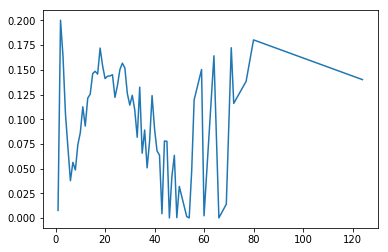

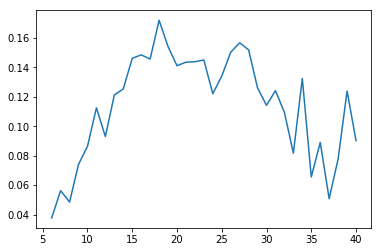

In [9]:
from matplotlib import pyplot as plt
print(f1.keys(), len(f1.keys()))
print ([np.mean(f1[x]) for x in f1.keys()], len([np.mean(f1[x]) for x in f1.keys()]))
keys=sorted(f1.keys())
# for i,k in enumerate(keys):
#     print(i,k)
plt.plot(keys, [np.mean(f1[x]) for x in keys])
plt.show()
plt.plot(keys[5:40], [np.mean(f1[x]) for x in keys[5:40]])
plt.show()

In [42]:
from functools import reduce
pred1= reduce(lambda x,y :x+y ,predictions)
labels1= reduce(lambda x,y :x+y ,labels[:200])
print (len(pred1),len(labels1))
print(f1_score(labels1, [label_dict[x] for x in pred1], average="weighted"))
print(accuracy_score(labels1, [label_dict[x] for x in pred1]))

2317 2317
0.1452906830596916
0.10142425550280536


/home/gagan/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
from sklearn.metrics import accuracy_score 
import numpy as np
accs = []
for i, (pred, true) in enumerate(zip(predictions, labels)):
    print(pred)
    print([label_dict[x] for x in pred])
    break
    acc = accuracy_score(true, [label_dict[x] for x in pred])
    accs.append((len(pred), acc))
#     print(i, acc)
#     print("predi:", pred)
#     print("truth:", np.array(true))

In [16]:
print(len(accs))

100


In [7]:
# import pandas as pd

# df = pd.read_dict
accs.sort(key = lambda x: x[0])

for item in accs:
    print(str(item[0])+'\t'+str(item[1]*100))

1	0.0
1	0.0
1	0.0
1	0.0
1	0.0
1	0.0
1	0.0
1	0.0
2	0.0
2	50.0
2	0.0
3	0.0
4	0.0
4	50.0
4	25.0
4	50.0
4	0.0
5	0.0
5	40.0
5	0.0
6	33.33333333333333
6	50.0
6	16.666666666666664
6	50.0
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	0.0
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
7	14.285714285714285
8	12.5
8	0.0
8	25.0
8	12.5
8	0.0
8	12.5
8	12.5
8	12.5
8	12.5
9	11.11111111111111
9	0.0
9	0.0
10	0.0
11	9.090909090909092
11	0.0
11	18.181818181818183
12	25.0
12	8.333333333333332
12	8.333333333333332
13	0.0
13	15.384615384615385
13	0.0
14	14.285714285714285
15	13.333333333333334
15	20.0
16	18.75
17	11.76470588235294
17	11.76470588235294
17	11.76470588235294
18	0.0
19	15.789473684210526
19	10.526315789473683
20	5

In [ ]:
hist = {}

for l, a in accs:
    temp = hist.get(l, [])
    temp.append(a)
    hist[l] = temp

In [ ]:
predictions = create_objective_fn(final_params, inference_mode=True)

accs = []
for i, (pred, true) in enumerate(zip(predictions, labels)):
    acc = accuracy_score(true, pred)
    accs.append((len(pred), acc))
    print(i, acc)
    print("predi:", pred)
    print("truth:", np.array(true))


#Stochastic or Batch gradient descent?
#what about constraints
# is this even relevant to opti?
# why can't we use likelihood as obj function?
# no. of hidden states == label_count?

In [ ]:
global sentences, labels
sentences,labels, vocab, label_vocab = create_vocabulary("./data/files/train")
sentences = np.array(sentences)
labels = np.array(labels)
global label_count
label_count = len(label_vocab)
global vocab_size
vocab_size = len(vocab)
init_pi = [1/label_count]*label_count
init_pi = np.array(init_pi).reshape(label_count)

init_trans = [[1/label_count]*label_count for i in range(label_count)]
init_trans = np.array(init_trans).reshape(label_count*label_count)

init_em = [[1/vocab_size]*label_count for i in range(vocab_size)]
init_em = np.array(init_em).reshape(vocab_size*label_count)

init_params = np.concatenate((init_pi, init_trans, init_em))

# random initialization
#    init_params = np.random.uniform(0,1,(1 + len(vocab) + label_count)*label_count)

lagrangian_params = np.random.uniform(0,1,(2 + len(vocab) + label_count)*label_count)
init_full_params = np.concatenate((init_params, lagrangian_params))

objective_grad = grad(create_objective_fn)

final_params = init_full_params
final_params = pickle.load(open('results/final_params_100_100iters.pkl', 'rb'))

#    final_params = adam(objective_grad, final_params, step_size=0.01, callback=callback,
#                    num_iters=100)
pkl_name = 'results/final_params_' + ''.join(random.choice(string.ascii_letters) for _ in range(6)) + '.pkl'
pickle.dump(final_params, open(pkl_name, 'wb'))

print("********End of training *******")
#    print("optimal params")
#    print_params(final_params, label_count, vocab_size)
#    print("---------------------")
print("Total 